In [2]:
import matplotlib.pyplot as plt

def hex2bin(s):
    mp = {'0': "0000",
          '1': "0001",
          '2': "0010",
          '3': "0011",
          '4': "0100",
          '5': "0101",
          '6': "0110",
          '7': "0111",
          '8': "1000",
          '9': "1001",
          'A': "1010",
          'B': "1011",
          'C': "1100",
          'D': "1101",
          'E': "1110",
          'F': "1111"}
    bin = ""
    for i in range(len(s)):
        bin = bin + mp[s[i]]
    return bin


def bin2hex(s):
    mp = {"0000": '0',
          "0001": '1',
          "0010": '2',
          "0011": '3',
          "0100": '4',
          "0101": '5',
          "0110": '6',
          "0111": '7',
          "1000": '8',
          "1001": '9',
          "1010": 'A',
          "1011": 'B',
          "1100": 'C',
          "1101": 'D',
          "1110": 'E',
          "1111": 'F'}
    hex = ""
    for i in range(0, len(s), 4):
        ch = ""
        ch = ch + s[i]
        ch = ch + s[i + 1]
        ch = ch + s[i + 2]
        ch = ch + s[i + 3]
        hex = hex + mp[ch]

    return hex

In [3]:
def bin2dec(binary):
    binary1 = binary
    decimal, i, n = 0, 0, 0
    while (binary != 0):
        dec = binary % 10
        decimal = decimal + dec * pow(2, i)
        binary = binary // 10
        i += 1
    return decimal


def dec2bin(num):
    res = bin(num).replace("0b", "")
    if (len(res) % 4 != 0):
        div = len(res) / 4
        div = int(div)
        counter = (4 * (div + 1)) - len(res)
        for i in range(0, counter):
            res = '0' + res
    return res


def permute(k, arr, n):
    permutation = ""
    for i in range(0, n):
        permutation = permutation + k[arr[i] - 1]
    return permutation


def shift_left(k, nth_shifts):
    s = ""
    for i in range(nth_shifts):
        for j in range(1, len(k)):
            s = s + k[j]
        s = s + k[0]
        k = s
        s = ""
    return k


def xor(a, b):
    ans = ""
    for i in range(len(a)):
        if a[i] == b[i]:
            ans = ans + "0"
        else:
            ans = ans + "1"
    return ans

In [4]:
initial_perm = [58, 50, 42, 34, 26, 18, 10, 2,
                60, 52, 44, 36, 28, 20, 12, 4,
                62, 54, 46, 38, 30, 22, 14, 6,
                64, 56, 48, 40, 32, 24, 16, 8,
                57, 49, 41, 33, 25, 17, 9, 1,
                59, 51, 43, 35, 27, 19, 11, 3,
                61, 53, 45, 37, 29, 21, 13, 5,
                63, 55, 47, 39, 31, 23, 15, 7]

exp_d = [32, 1, 2, 3, 4, 5, 4, 5,
         6, 7, 8, 9, 8, 9, 10, 11,
         12, 13, 12, 13, 14, 15, 16, 17,
         16, 17, 18, 19, 20, 21, 20, 21,
         22, 23, 24, 25, 24, 25, 26, 27,
         28, 29, 28, 29, 30, 31, 32, 1]


per = [16, 7, 20, 21,
       29, 12, 28, 17,
       1, 15, 23, 26,
       5, 18, 31, 10,
       2, 8, 24, 14,
       32, 27, 3, 9,
       19, 13, 30, 6,
       22, 11, 4, 25]


sbox = [[[14, 4, 13, 1, 2, 15, 11, 8, 3, 10, 6, 12, 5, 9, 0, 7],
         [0, 15, 7, 4, 14, 2, 13, 1, 10, 6, 12, 11, 9, 5, 3, 8],
         [4, 1, 14, 8, 13, 6, 2, 11, 15, 12, 9, 7, 3, 10, 5, 0],
         [15, 12, 8, 2, 4, 9, 1, 7, 5, 11, 3, 14, 10, 0, 6, 13]],

        [[15, 1, 8, 14, 6, 11, 3, 4, 9, 7, 2, 13, 12, 0, 5, 10],
         [3, 13, 4, 7, 15, 2, 8, 14, 12, 0, 1, 10, 6, 9, 11, 5],
         [0, 14, 7, 11, 10, 4, 13, 1, 5, 8, 12, 6, 9, 3, 2, 15],
         [13, 8, 10, 1, 3, 15, 4, 2, 11, 6, 7, 12, 0, 5, 14, 9]],

        [[10, 0, 9, 14, 6, 3, 15, 5, 1, 13, 12, 7, 11, 4, 2, 8],
         [13, 7, 0, 9, 3, 4, 6, 10, 2, 8, 5, 14, 12, 11, 15, 1],
         [13, 6, 4, 9, 8, 15, 3, 0, 11, 1, 2, 12, 5, 10, 14, 7],
         [1, 10, 13, 0, 6, 9, 8, 7, 4, 15, 14, 3, 11, 5, 2, 12]],

        [[7, 13, 14, 3, 0, 6, 9, 10, 1, 2, 8, 5, 11, 12, 4, 15],
         [13, 8, 11, 5, 6, 15, 0, 3, 4, 7, 2, 12, 1, 10, 14, 9],
         [10, 6, 9, 0, 12, 11, 7, 13, 15, 1, 3, 14, 5, 2, 8, 4],
         [3, 15, 0, 6, 10, 1, 13, 8, 9, 4, 5, 11, 12, 7, 2, 14]],

        [[2, 12, 4, 1, 7, 10, 11, 6, 8, 5, 3, 15, 13, 0, 14, 9],
         [14, 11, 2, 12, 4, 7, 13, 1, 5, 0, 15, 10, 3, 9, 8, 6],
         [4, 2, 1, 11, 10, 13, 7, 8, 15, 9, 12, 5, 6, 3, 0, 14],
         [11, 8, 12, 7, 1, 14, 2, 13, 6, 15, 0, 9, 10, 4, 5, 3]],

        [[12, 1, 10, 15, 9, 2, 6, 8, 0, 13, 3, 4, 14, 7, 5, 11],
         [10, 15, 4, 2, 7, 12, 9, 5, 6, 1, 13, 14, 0, 11, 3, 8],
         [9, 14, 15, 5, 2, 8, 12, 3, 7, 0, 4, 10, 1, 13, 11, 6],
         [4, 3, 2, 12, 9, 5, 15, 10, 11, 14, 1, 7, 6, 0, 8, 13]],

        [[4, 11, 2, 14, 15, 0, 8, 13, 3, 12, 9, 7, 5, 10, 6, 1],
         [13, 0, 11, 7, 4, 9, 1, 10, 14, 3, 5, 12, 2, 15, 8, 6],
         [1, 4, 11, 13, 12, 3, 7, 14, 10, 15, 6, 8, 0, 5, 9, 2],
         [6, 11, 13, 8, 1, 4, 10, 7, 9, 5, 0, 15, 14, 2, 3, 12]],

        [[13, 2, 8, 4, 6, 15, 11, 1, 10, 9, 3, 14, 5, 0, 12, 7],
         [1, 15, 13, 8, 10, 3, 7, 4, 12, 5, 6, 11, 0, 14, 9, 2],
         [7, 11, 4, 1, 9, 12, 14, 2, 0, 6, 10, 13, 15, 3, 5, 8],
         [2, 1, 14, 7, 4, 10, 8, 13, 15, 12, 9, 0, 3, 5, 6, 11]]]


final_perm = [40, 8, 48, 16, 56, 24, 64, 32,
              39, 7, 47, 15, 55, 23, 63, 31,
              38, 6, 46, 14, 54, 22, 62, 30,
              37, 5, 45, 13, 53, 21, 61, 29,
              36, 4, 44, 12, 52, 20, 60, 28,
              35, 3, 43, 11, 51, 19, 59, 27,
              34, 2, 42, 10, 50, 18, 58, 26,
              33, 1, 41, 9, 49, 17, 57, 25]

In [5]:
def encrypt(pt, rkb, rk):
    pt = hex2bin(pt)

    pt = permute(pt, initial_perm, 64)
    # print("After initial permutation", bin2hex(pt))
    lst = []
    left = pt[0:32]
    right = pt[32:64]
    for i in range(0, 16):
        right_expanded = permute(right, exp_d, 48)

        xor_x = xor(right_expanded, rkb[i])

        sbox_str = ""
        for j in range(0, 8):
            row = bin2dec(int(xor_x[j * 6] + xor_x[j * 6 + 5]))
            col = bin2dec(int(xor_x[j * 6 + 1] + xor_x[j * 6 + 2] + xor_x[j * 6 + 3] + xor_x[j * 6 + 4]))
            val = sbox[j][row][col]
            sbox_str = sbox_str + dec2bin(val)


        sbox_str = permute(sbox_str, per, 32)

        result = xor(left, sbox_str)
        left = result

        if (i != 15):
            left, right = right, left
        # print("Round ", i + 1, " ", bin2hex(left), " ", bin2hex(right), " ", rk[i])
        lst.append(left + right)

    return lst


def hammingdist(str1, str2):
    ans = 0
    for x, y in zip(str1, str2):
        if(x != y):
            ans = ans + 1
    return ans

[[7, 6, 10, 11, 14], [27, 20, 27, 27, 30], [42, 35, 33, 33, 35], [44, 39, 29, 28, 31], [42, 35, 26, 23, 36], [32, 33, 27, 26, 38], [25, 32, 37, 38, 34], [32, 31, 40, 43, 35], [35, 36, 36, 39, 34], [28, 38, 30, 31, 29], [28, 33, 30, 25, 28], [27, 31, 35, 27, 34], [29, 31, 35, 26, 34], [35, 29, 25, 26, 28], [36, 28, 24, 34, 29], [33, 27, 31, 38, 28]]


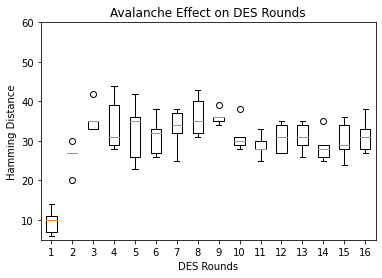

In [14]:
pt = ["134687D4AB231457", "134687D4AB231456", "134687D4AB231454", "134687D4AB231444", "134687D4AB233444"]
key = "AABB09182736CCDD"
origpt = "134687DCAB231457"
key = hex2bin(key)

keyp = [57, 49, 41, 33, 25, 17, 9,
        1, 58, 50, 42, 34, 26, 18,
        10, 2, 59, 51, 43, 35, 27,
        19, 11, 3, 60, 52, 44, 36,
        63, 55, 47, 39, 31, 23, 15,
        7, 62, 54, 46, 38, 30, 22,
        14, 6, 61, 53, 45, 37, 29,
        21, 13, 5, 28, 20, 12, 4]

key = permute(key, keyp, 56)

shift_table = [1, 1, 2, 2,
               2, 2, 2, 2,
               1, 2, 2, 2,
               2, 2, 2, 1]

key_comp = [14, 17, 11, 24, 1, 5,
            3, 28, 15, 6, 21, 10,
            23, 19, 12, 4, 26, 8,
            16, 7, 27, 20, 13, 2,
            41, 52, 31, 37, 47, 55,
            30, 40, 51, 45, 33, 48,
            44, 49, 39, 56, 34, 53,
            46, 42, 50, 36, 29, 32]

left = key[0:28]
right = key[28:56]

rkb = []
rk = []
for i in range(0, 16):
    left = shift_left(left, shift_table[i])
    right = shift_left(right, shift_table[i])
    combine_str = left + right
    round_key = permute(combine_str, key_comp, 48)
    rkb.append(round_key)
    rk.append(bin2hex(round_key))

res = []

parent_ciphers = encrypt(origpt, rkb, rk)

for txt in pt:
    lst = encrypt(txt, rkb, rk)
    res.append(lst)

res =[[row[i] for row in res] for i in range(len(res[0]))]

hamming_distances=[]

for i in range(16):
    temp=[]
    for j in range(5):
        hd=hammingdist(res[i][j] , parent_ciphers[i])
        temp.append(hd)
    hamming_distances.append(temp)
print(hamming_distances)

plt.boxplot(hamming_distances)
plt.title('Avalanche Effect on DES Rounds')
plt.xlabel('DES Rounds')
plt.ylabel('Hamming Distance')
plt.ylim(5, 60)
plt.show()

[[11, 28, 14, 19, 25], [24, 38, 26, 31, 35], [29, 33, 28, 28, 34], [32, 28, 29, 24, 30], [32, 30, 34, 28, 29], [30, 33, 32, 37, 26], [27, 24, 31, 34, 29], [28, 25, 33, 26, 38], [33, 33, 34, 26, 39], [28, 31, 34, 27, 36], [26, 32, 32, 31, 34], [28, 33, 33, 35, 34], [31, 29, 34, 34, 36], [36, 29, 30, 25, 32], [36, 31, 33, 26, 27], [40, 36, 33, 31, 29]]


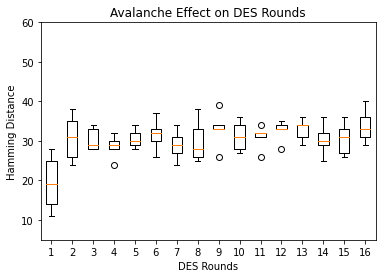

In [16]:
pt = ["134687DCFE231427", "888887DCAB231458", "134787DCAB545257", "23468AEFAB231457", "339966FACB231457"]
key = "AABB09182736CCDD"
origpt = "134687DCAB231457"
key = hex2bin(key)

keyp = [57, 49, 41, 33, 25, 17, 9,
        1, 58, 50, 42, 34, 26, 18,
        10, 2, 59, 51, 43, 35, 27,
        19, 11, 3, 60, 52, 44, 36,
        63, 55, 47, 39, 31, 23, 15,
        7, 62, 54, 46, 38, 30, 22,
        14, 6, 61, 53, 45, 37, 29,
        21, 13, 5, 28, 20, 12, 4]

key = permute(key, keyp, 56)

shift_table = [1, 1, 2, 2,
               2, 2, 2, 2,
               1, 2, 2, 2,
               2, 2, 2, 1]

key_comp = [14, 17, 11, 24, 1, 5,
            3, 28, 15, 6, 21, 10,
            23, 19, 12, 4, 26, 8,
            16, 7, 27, 20, 13, 2,
            41, 52, 31, 37, 47, 55,
            30, 40, 51, 45, 33, 48,
            44, 49, 39, 56, 34, 53,
            46, 42, 50, 36, 29, 32]

left = key[0:28]
right = key[28:56]

rkb = []
rk = []
for i in range(0, 16):
    left = shift_left(left, shift_table[i])
    right = shift_left(right, shift_table[i])
    combine_str = left + right
    round_key = permute(combine_str, key_comp, 48)
    rkb.append(round_key)
    rk.append(bin2hex(round_key))

res = []
parent_ciphers = encrypt(origpt, rkb, rk)

for txt in pt:
    lst = encrypt(txt, rkb, rk)
    res.append(lst)
    
res =[[row[i] for row in res] for i in range(len(res[0]))]

hamming_distances=[]

for i in range(16):
    temp=[]
    for j in range(5):
        hd=hammingdist(res[i][j] , parent_ciphers[i])
        temp.append(hd)
    hamming_distances.append(temp)
print(hamming_distances)
# print(res)

plt.boxplot(hamming_distances)
plt.title('Avalanche Effect on DES Rounds')
plt.xlabel('DES Rounds')
plt.ylabel('Hamming Distance')
plt.ylim(5, 60)
plt.show()

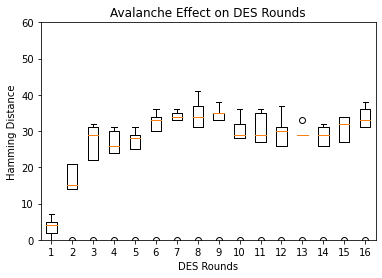

In [20]:
pt = "134687DCAB231457"
okey = "FEBC8271123A987D"
keyList = ["FEBC8271123A987C", "FE2C8271123A987C", "FEBC82A1123A987C", "FEBC8271F23A987C", "FEBC82711E3A987C"]

res = []
for i in range(16):
    res.append([])

key = hex2bin(okey)

keyp = [57, 49, 41, 33, 25, 17, 9,
        1, 58, 50, 42, 34, 26, 18,
        10, 2, 59, 51, 43, 35, 27,
        19, 11, 3, 60, 52, 44, 36,
        63, 55, 47, 39, 31, 23, 15,
        7, 62, 54, 46, 38, 30, 22,
        14, 6, 61, 53, 45, 37, 29,
        21, 13, 5, 28, 20, 12, 4]

key = permute(key, keyp, 56)

shift_table = [1, 1, 2, 2,
              2, 2, 2, 2,
              1, 2, 2, 2,
              2, 2, 2, 1]

key_comp = [14, 17, 11, 24, 1, 5,
            3, 28, 15, 6, 21, 10,
            23, 19, 12, 4, 26, 8,
            16, 7, 27, 20, 13, 2,
            41, 52, 31, 37, 47, 55,
            30, 40, 51, 45, 33, 48,
            44, 49, 39, 56, 34, 53,
            46, 42, 50, 36, 29, 32]

left = key[0:28]
right = key[28:56]

rkb = []
rk = []
for i in range(0, 16):
    left = shift_left(left, shift_table[i])
    right = shift_left(right, shift_table[i])
    combine_str = left + right
    round_key = permute(combine_str, key_comp, 48)
    rkb.append(round_key)
    rk.append(bin2hex(round_key))
lst = encrypt(pt, rkb, rk)

for key in keyList:
    key = hex2bin(key)

    keyp = [57, 49, 41, 33, 25, 17, 9,
            1, 58, 50, 42, 34, 26, 18,
            10, 2, 59, 51, 43, 35, 27,
            19, 11, 3, 60, 52, 44, 36,
            63, 55, 47, 39, 31, 23, 15,
            7, 62, 54, 46, 38, 30, 22,
            14, 6, 61, 53, 45, 37, 29,
            21, 13, 5, 28, 20, 12, 4]

    key = permute(key, keyp, 56)

    shift_table = [1, 1, 2, 2,
                  2, 2, 2, 2,
                  1, 2, 2, 2,
                  2, 2, 2, 1]

    key_comp = [14, 17, 11, 24, 1, 5,
                3, 28, 15, 6, 21, 10,
                23, 19, 12, 4, 26, 8,
                16, 7, 27, 20, 13, 2,
                41, 52, 31, 37, 47, 55,
                30, 40, 51, 45, 33, 48,
                44, 49, 39, 56, 34, 53,
                46, 42, 50, 36, 29, 32]

    left = key[0:28]
    right = key[28:56]

    rkb = []
    rk = []
    for i in range(0, 16):
        left = shift_left(left, shift_table[i])
        right = shift_left(right, shift_table[i])
        combine_str = left + right
        round_key = permute(combine_str, key_comp, 48)
        rkb.append(round_key)
        rk.append(bin2hex(round_key))
    lst1 = encrypt(pt, rkb, rk)
    newlist = []
    for x, item in zip(lst1, lst):
        newlist.append(hammingdist(item, x))
    for i in range(16):
        res[i].append(newlist[i])



plt.boxplot(res)
plt.title('Avalanche Effect on DES Rounds')
plt.xlabel('DES Rounds')
plt.ylabel('Hamming Distance')
plt.ylim(0, 60)
plt.show()